<a href="https://colab.research.google.com/github/bcmin1018/NLP/blob/main/MRC/QA_BERT_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1n74_kfEjrjkHYsUr1CugGgzxL7ns28gV
!gdown --id 1lMszENg5tEyeTnm2XR0X0876HKltWlLk
!gdown --id 14FUap4xX_XMfq1T4RS3nJXeomQiDm4Nu
!gdown --id 1ygUD3YA9goXs20h6gvmrxkBjMzJlCQjR
!unzip -qq "./train.zip"
!unzip -qq "./test.zip"

train_data = "/content/train.json"
valid_data = "/content/train.json"
test_data = "/content/test.json"
submission = "/content/sample_submission.csv"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1n74_kfEjrjkHYsUr1CugGgzxL7ns28gV
To: /content/train.zip
100% 17.4M/17.4M [00:00<00:00, 187MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1lMszENg5tEyeTnm2XR0X0876HKltWlLk
To: /content/test.zip
100% 844k/844k [00:00<00:00, 144MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://driv

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pprint

In [3]:
train_data = json.load(open("/content/train.json", 'r', encoding='utf8'))
pprint.pprint(train_data['data'][0])

{'content_id': 'CNTS_4740509086',
 'paragraphs': [{'context': '이 글에서는 제안한 기술경쟁력 평가 방법의 특징은 두 가지로 요약된다. 첫째, 현재의 '
                            '경쟁력보다는 미래의 경쟁력을 평가하도록 평가의 대상을 확대해야 한다. 지금까지의 경쟁력 '
                            '평가가 현위치를 중심으로 한 것이었다면, 앞으로의 대안은 과정과 경로를 중시하는 것이 '
                            '되어야 한다는 것이다. 사실 지식정보화사회에서 가진 것이란 허망한 것이다. 현재의 '
                            '기술수준이 높더라고, 이를 끊임없이 개량하고 새로운 기술을 발전시킬 수 있는 능력이 '
                            '없다면 미래의 전망은 어둡다. 기술이나 정보는 실물 자산보다 진부화율이 매우 높다. '
                            '둘째, 기술경쟁력 평가를 순위를 매기는 작업이 아니라 이를 통하여 장점과 단점을 파악하는 '
                            '과정으로 활용하여야 한다. 순위는 대중적인 흥미는 끌 수 있지만, 그것으로부터 교훈이 '
                            '도출되는 것은 아니다. 기술경쟁력의 평가를 통해서 외국시스템의 장점을 배우고, 한국 '
                            '시스템의 단점을 교정하는 대안이 발견될 수 있다. 경쟁이란 남과 비교하는 것을 의미한다. '
                            '내가 아무리 잘 하더라도 남이 나보다 더 잘 한다면 경쟁에서 진다. 그래서 경쟁은 '
                            '각박하지만, 과학기술은 경쟁을 피할 수 있는 분야가 아니다. 경쟁 상대국을 연구하고, '
                    

In [5]:
documents = []
for d in train_data['data']:
  documents += [p['context'] for p in d['paragraphs']]
  
print('전체 텍스트 수: {}'.format(len(documents)))

전체 텍스트 수: 37329


In [11]:
len_docs = []
for d in documents:
  len_docs.append(len(d.split()))
print('텍스트 최대길이: {}'.format(np.max(len_docs)))
print('텍스트 최소길이: {}'.format(np.min(len_docs)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_docs)))
print('텍스트 길이 표준 편차: {:.2f}'.format(np.std(len_docs)))
print('텍스트 중간 길이: {}'.format(np.median(len_docs)))
print('1사분위 텍스트 길이: {}'.format(np.percentile(len_docs, 25)))
print('3사분위 텍스트 길이: {}'.format(np.percentile(len_docs, 75)))

텍스트 최대길이: 180
텍스트 최소길이: 38
텍스트 평균 길이: 111.88
텍스트 길이 표준 편차: 18.96
텍스트 중간 길이: 111.0
1사분위 텍스트 길이: 98.0
3사분위 텍스트 길이: 126.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f2c0549f710>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c054ab710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c054b2c90>],
 'means': [<matplotlib.lines.Line2D at 0x7f2c05591a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c054b2210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c0549fc50>,
  <matplotlib.lines.Line2D at 0x7f2c054ab1d0>]}

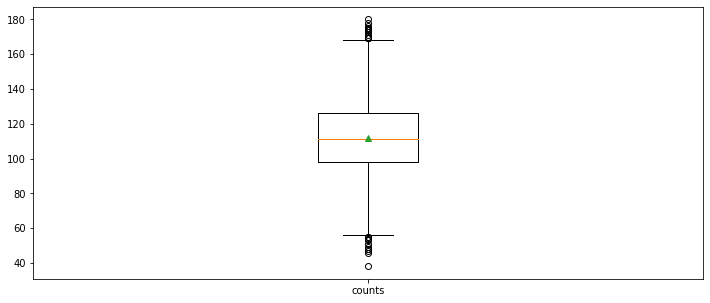

In [14]:
plt.figure(figsize=(12,5))
plt.boxplot([len_docs],
            labels=['counts'],
            showmeans=True)

Text(0, 0.5, 'Probablility')

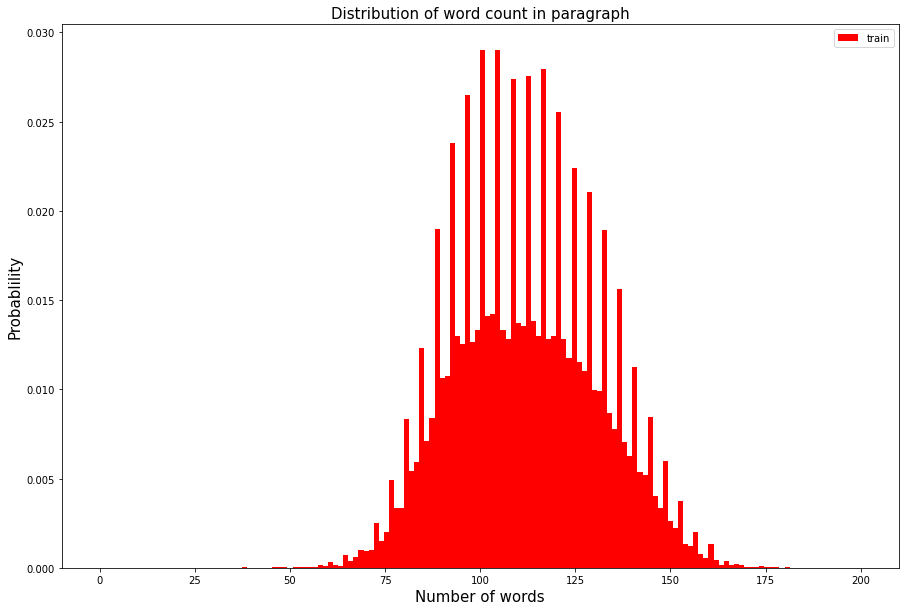

In [17]:
plt.figure(figsize=(15, 10))
plt.hist(len_docs, bins=150, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probablility', fontsize=15)